# Taller 4

<center>

|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |

</center>

<br>

---

<br>

---

## 2. Generando Datos y Estimando Parámteros

Recordemos el modelo de la alarma antirrobo
<center>
<img src="image/4_Red.png" width="400" height="350" />
</center>

Las probabilidades son

- **Robo**: 

<center>

|  R  | P(R) |
| :-: | :--: |
|  V  | 0.01 |
|  F  | 0.99 |

</center>

- **Sismo**: 

<center>

|  S  | P(S) |
| :-: | :--: |
|  V  | 0.02 |
|  F  | 0.98 |

</center>

- **Alarma**:
<center>

| P ( A &#124; R , S) |   R   |   V   |   V   |   F   |   F   |
| :-----------------: | :---: | :---: | :---: | :---: | :---: |
|        **A**        | **S** | **V** | **F** | **V** | **F** |
|          V          |       | 0.95  | 0.94  | 0.29  | 0.001 |
|          F          |       | 0.05  | 0.06  | 0.71  | 0.999 |

</center>

- **Juan**:

<center>

| P( J &#124; A ) |  A  |  A   |
| :-------------: | :-: | :--: |
|      **J**      |  V  |  F   |
|        V        | 0.9 | 0.05 |
|        F        | 0.1 | 0.95 |

</center>

<br>

- **Maria**:

<center>

| P( M &#124; A ) |  A  |  A   |
| :-------------: | :-: | :--: |
|      **M**      |  V  |  F   |
|        V        | 0.7 | 0.01 |
|        F        | 0.3 | 0.99 |

</center>

In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

# Estructura de la red incluyendo los arcos y nodos
model = BayesianNetwork([("R","A"),("S","A"),("A","J"),("A","M")])

# CPD: Conditional Probability Distribution
# CPD de R 
cpd_r = TabularCPD(
    variable="R",
    variable_card=2,
    values=[
        [0.01], 
        [0.99]])

# CPD de S
cpd_s = TabularCPD(
    variable="S",
    variable_card=2,
    values=[
        [0.02], 
        [0.98]])

# CPD de A
cpd_a = TabularCPD(
    variable="A",
    variable_card=2,
    values=[
        [0.95, 0.94, 0.29, 0.001],
        [0.05, 0.06, 0.71, 0.999],
    ],
    evidence=["R", "S"],
    evidence_card=[2, 2])

# CPD de J
cpd_j = TabularCPD(
    variable="J",
    variable_card=2,
    values=[
        [0.9, 0.05],
        [0.1, 0.95],
    ],
    evidence=["A"],
    evidence_card=[2])

# CPD de M
cpd_m = TabularCPD(
    variable="M",
    variable_card=2,
    values=[
        [0.7, 0.01],
        [0.3, 0.99],
    ],
    evidence=["A"],
    evidence_card=[2])

# Associate the CPD's to the model
model.add_cpds(cpd_r, cpd_s, cpd_a, cpd_j, cpd_m)

#Revise que su modelo este completo
model.check_model()

True

### 2
Usando este modelo, use el módulo de muestreo de pgmpy para generar 100,000
núumeros aleatorios de acuerdo con la distribución definida por el grafo.

In [2]:
from pgmpy.sampling import BayesianModelSampling
samples = BayesianModelSampling(model).forward_sample(size=100000)
samples.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,R,A,S,J,M
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1


### 3

Cree un nuevo modelo con la misma estructura del inicial, pero sin parámetros.

In [3]:
from pgmpy.models import BayesianNetwork

# Estructura de la red incluyendo los arcos y nodos
mod_fit_mv = BayesianNetwork([("R","A"),("S","A"),("A","J"),("A","M")])

### 4

Emplee el módulo de ajuste de pgmpy para ajustar algunas CPDs del nuevo modelo.

In [4]:
from pgmpy.estimators import MaximumLikelihoodEstimator

# Create the model to adjust the CPD's
emv = MaximumLikelihoodEstimator(model=mod_fit_mv, data=samples)

# CPD de R 
cpdem_r = emv.estimate_cpd(node='R')
print(cpdem_r)
# CPD de S
cpdem_s = emv.estimate_cpd(node='S')
print(cpdem_s)
# CPD de A
cpdem_a = emv.estimate_cpd(node='A')
print(cpdem_a)

+------+---------+
| R(0) | 0.01005 |
+------+---------+
| R(1) | 0.98995 |
+------+---------+
+------+---------+
| S(0) | 0.02009 |
+------+---------+
| S(1) | 0.97991 |
+------+---------+
+------+--------+-----+-----------------------+
| R    | R(0)   | ... | R(1)                  |
+------+--------+-----+-----------------------+
| S    | S(0)   | ... | S(1)                  |
+------+--------+-----+-----------------------+
| A(0) | 0.9375 | ... | 0.0008762705923589204 |
+------+--------+-----+-----------------------+
| A(1) | 0.0625 | ... | 0.999123729407641     |
+------+--------+-----+-----------------------+


### 5

Emplee el método fit para ajustar todas las CPDs al tiempo y explore el resultado.

In [5]:
# Adjust the CPD's of all variables to the Data
mod_fit_mv.fit(
    data=samples,
    estimator=MaximumLikelihoodEstimator
)

for i in mod_fit_mv.nodes():
    print(i)
    print(mod_fit_mv.get_cpds(i))

R
+------+---------+
| R(0) | 0.01005 |
+------+---------+
| R(1) | 0.98995 |
+------+---------+
A
+------+--------+-----+-----------------------+
| R    | R(0)   | ... | R(1)                  |
+------+--------+-----+-----------------------+
| S    | S(0)   | ... | S(1)                  |
+------+--------+-----+-----------------------+
| A(0) | 0.9375 | ... | 0.0008762705923589204 |
+------+--------+-----+-----------------------+
| A(1) | 0.0625 | ... | 0.999123729407641     |
+------+--------+-----+-----------------------+
S
+------+---------+
| S(0) | 0.02009 |
+------+---------+
| S(1) | 0.97991 |
+------+---------+
J
+------+---------------------+----------------------+
| A    | A(0)                | A(1)                 |
+------+---------------------+----------------------+
| J(0) | 0.9023929471032746  | 0.050349550867780354 |
+------+---------------------+----------------------+
| J(1) | 0.09760705289672544 | 0.9496504491322196   |
+------+---------------------+----------------

### 6

Defina ahora un estimador Bayesiano en pgmpy.

In [6]:
from pgmpy.estimators import BayesianEstimator

eby = BayesianEstimator(model=mod_fit_mv, data=samples)

### 7

Realice nuevamente la estimación del modelo usando un prior.

In [7]:
cpdby_r = eby.estimate_cpd(node='R', 
                           prior_type='dirichlet',
                           pseudo_counts=[[100000], [200000]])
print(cpdby_r)

+------+----------+
| R(0) | 0.252512 |
+------+----------+
| R(1) | 0.747487 |
+------+----------+


Modifique los valores de pseudocounts e interprete los resultados. Incluya sus resultados y observaciones en su reporte.

In [32]:
import pandas as pd

df = pd.DataFrame({"alpha_0": [], "alpha_1": [], "R_0": [], "R_1": []})

alpha = 300000
for i in range(0, alpha+1, 200):
    alpha_0 = i
    alpha_1 = alpha-alpha_0
    
    cpdby_r = eby.estimate_cpd(node='R', 
                            prior_type='dirichlet',
                            pseudo_counts=[[alpha_0], [alpha_1]])
    datos = cpdby_r.get_values()
    row = pd.DataFrame({"alpha_0": alpha_0, "alpha_1": alpha_1, 
                        "R_0": datos[0], "R_1": datos[1]})
    df = pd.concat([df, row])    
    
df.reset_index()

,index,alpha_0,alpha_1,R_0,R_1
0,0,0.0,300000.0,0.002512,0.997487
1,0,200.0,299800.0,0.003012,0.996988
2,0,400.0,299600.0,0.003512,0.996487
3,0,600.0,299400.0,0.004012,0.995988
4,0,800.0,299200.0,0.004513,0.995487
...,...,...,...,...,...
1496,0,299200.0,800.0,0.750513,0.249488
1497,0,299400.0,600.0,0.751012,0.248988
1498,0,299600.0,400.0,0.751513,0.248488
1499,0,299800.0,200.0,0.752012,0.247987


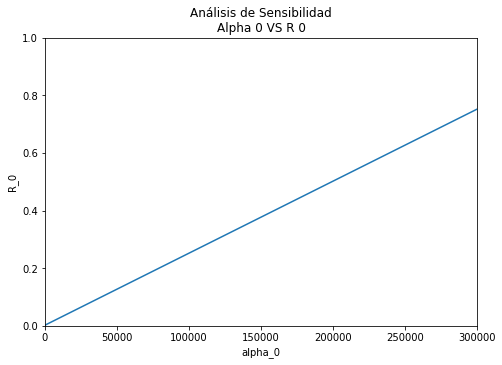

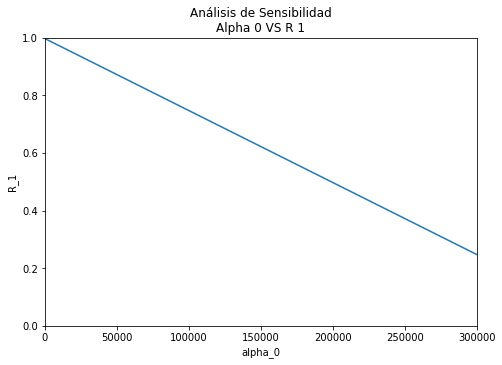

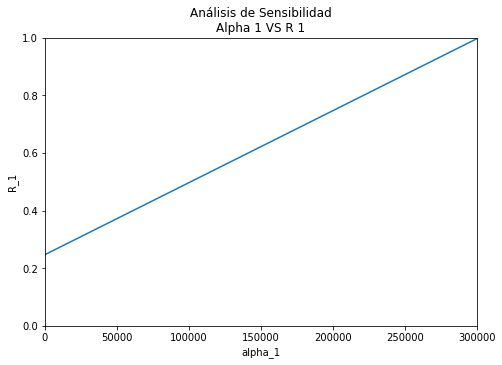

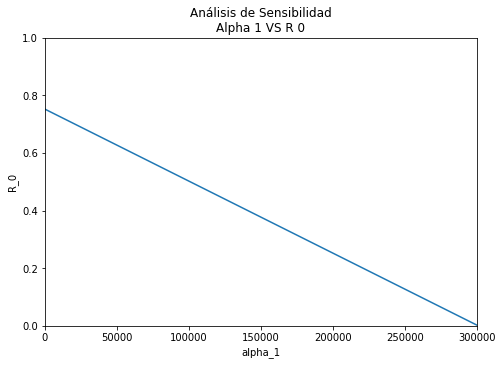

In [38]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.alpha_0, df.R_0)
plt.setp(ax, ylim=(0, 1), xlim=(0, 300000))
ax.set_xlabel("alpha_0")
ax.set_ylabel("R_0")
ax.set_title("Análisis de Sensibilidad\nAlpha 0 VS R 0")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.alpha_0, df.R_1)
plt.setp(ax, ylim=(0, 1), xlim=(0, 300000))
ax.set_xlabel("alpha_0")
ax.set_ylabel("R_1")
ax.set_title("Análisis de Sensibilidad\nAlpha 0 VS R 1")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.alpha_1, df.R_1)
plt.setp(ax, ylim=(0, 1), xlim=(0, 300000))
ax.set_xlabel("alpha_1")
ax.set_ylabel("R_1")
ax.set_title("Análisis de Sensibilidad\nAlpha 1 VS R 1")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df.alpha_1, df.R_0)
plt.setp(ax, ylim=(0, 1), xlim=(0, 300000))
ax.set_xlabel("alpha_1")
ax.set_ylabel("R_0")
ax.set_title("Análisis de Sensibilidad\nAlpha 1 VS R 0")
plt.show()

## Ahora con otra Red y otros Datos

Realice el proceso de estimación de la red en la gráfica, empleando los datos del archivo adjunto. Estudie los parámetros obtenidos en su reporte.

In [10]:
# Create the model with the graph
model = BayesianNetwork(
    [("asia", "tub"), 
     ("tub", "either"),
     ("smoke", "lung"),
     ("lung", "either"),
     ("smoke", "bronc"),
     ("either", "xray"),
     ("either", "dysp"),
     ("bronc", "dysp")]
)

In [11]:
# Read the Data
df = pd.read_csv("Data/data_asia.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,asia,tub,smoke,lung,bronc,either,xray,dysp
0,no,no,no,no,yes,no,no,no
1,no,no,no,yes,no,yes,yes,no
2,no,no,no,no,no,no,no,no
3,no,no,yes,no,yes,no,no,yes
4,no,no,yes,no,no,no,no,no


In [12]:
# Fit the model to the data
model.fit(
    data=df,
    estimator=MaximumLikelihoodEstimator
)

for i in model.nodes():
    print(i)
    print(model.get_cpds(i))

asia
+-----------+---------+
| asia(no)  | 0.99057 |
+-----------+---------+
| asia(yes) | 0.00943 |
+-----------+---------+
tub
+----------+----------------------+---------------------+
| asia     | asia(no)             | asia(yes)           |
+----------+----------------------+---------------------+
| tub(no)  | 0.9895918511564049   | 0.9448568398727466  |
+----------+----------------------+---------------------+
| tub(yes) | 0.010408148843595103 | 0.05514316012725345 |
+----------+----------------------+---------------------+
either
+-------------+----------+----------+-----------+-----------+
| lung        | lung(no) | lung(no) | lung(yes) | lung(yes) |
+-------------+----------+----------+-----------+-----------+
| tub         | tub(no)  | tub(yes) | tub(no)   | tub(yes)  |
+-------------+----------+----------+-----------+-----------+
| either(no)  | 1.0      | 0.0      | 0.0       | 0.0       |
+-------------+----------+----------+-----------+-----------+
| either(yes) | 0.0     